# Text Mining

# Set up

In [90]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from PIL import Image
from textblob import TextBlob
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [58]:
import spacy  ## for lemmatization
from spacy.lang.en import STOP_WORDS

In [59]:
from sklearn.feature_extraction.text import CountVectorizer ## to return a bag of words

In [60]:
nlp=spacy.load('en_core_web_sm')

In [7]:
Hotel_reviews=pd.read_csv('tourist_accommodation_reviews.csv')
Hotel_reviews.info()
Hotel_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [8]:
Hotel_reviews.Location.value_counts().index

Index([' Patong', ' Karon', ' Kata Beach', ' Rawai', ' Choeng Thale',
       ' Phuket Town', ' Kamala', ' Mai Khao', ' Cape Panwa', ' Chalong',
       ' Thalang District', ' Kathu', ' Nai Yang', ' Nai Harn',
       ' Bang Tao Beach', ' Karon Beach', ' Wichit', ' Talat Yai', ' Koh Kaew',
       ' Kata Noi Beach', ' Pa Khlok', ' Ratsada', ' Talat Nuea', ' Nai Thon',
       ' Sakhu'],
      dtype='object')

In [9]:
location_of_interest=[' Patong', ' Karon']

In [10]:
hotel_in_location = Hotel_reviews[Hotel_reviews.Location.isin(location_of_interest)]

In [11]:
len(hotel_in_location['Hotel/Restaurant name'].value_counts().index) #To determine the number of hotels in the locations

222

In [12]:
len(hotel_in_location['Hotel/Restaurant name'].unique())

222

In [13]:
## Picking the first thirty hotels of choice in sequence
hotel_in_sequence=hotel_in_location['Hotel/Restaurant name'].unique()[:30]

In [14]:
hotel_in_sequence

array(["Sam's Steaks and Grill", 'The Palm Cuisine',
       'Highway Curry Indian & Thai Cuisine', 'Tandoori Flames',
       'Pad Thai Shop', 'Ao Chalong Yacht Club Restaurant',
       "Naughty Nuri's Phuket", 'Natural Efe Macrobiotic World',
       'Sizzle Rooftop Restaurant', 'Climax on Bangla',
       'Le Brooklyn Patong', 'La Dolce Vita Restaurant', 'Sabaijai Cafe',
       'i-Kroon Cafe', 'Salute Italian Restaurant',
       'Rustic - Eatery & Bar', 'Austrian Garden Restaurant',
       'Trattoria Capri da Rico', 'Vista', 'The Blue Mango Bar and Grill',
       'Nami', 'Kalika 76 Restaurant', 'La Gritta',
       'Sandwich Shoppe Cafe & Bar Patong Phuket',
       'Halfway Inn (Restaurant)', 'ICC Indian Curry Club',
       "Rosco's Restaurant & Sports Bar",
       'BYD Lofts Restaurant Bistro & Bar', 'Home Dining Cafe & Lounge',
       'Soul Curry Restaurant and Bar'], dtype=object)

In [15]:
## Selecting reviews for the thirty hotels and the hotel names

hotel_30 = Hotel_reviews[['Hotel/Restaurant name', 'Review']][Hotel_reviews['Hotel/Restaurant name'].isin(hotel_in_sequence)]
hotel_30

,Hotel/Restaurant name,Review
793,Sam's Steaks and Grill,its very expensive in comparison to other loca...
794,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
795,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
796,Sam's Steaks and Grill,We made a reservation at the last minute to di...
797,Sam's Steaks and Grill,We had a very great time to celebrate my son b...
...,...,...
7827,Soul Curry Restaurant and Bar,We luckily got our hotel room booked at Silver...
7828,Soul Curry Restaurant and Bar,"The best food we had in Thailand, we had bad t..."
7829,Soul Curry Restaurant and Bar,Best Indian meals you could ask for in Phuket....
7830,Soul Curry Restaurant and Bar,"Good ambience and great service, had fantastic..."


In [16]:
#Resetting the index

hotel_30=hotel_30.reset_index(drop=True)
hotel_30.head()

,Hotel/Restaurant name,Review
0,Sam's Steaks and Grill,its very expensive in comparison to other loca...
1,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
2,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
3,Sam's Steaks and Grill,We made a reservation at the last minute to di...
4,Sam's Steaks and Grill,We had a very great time to celebrate my son b...


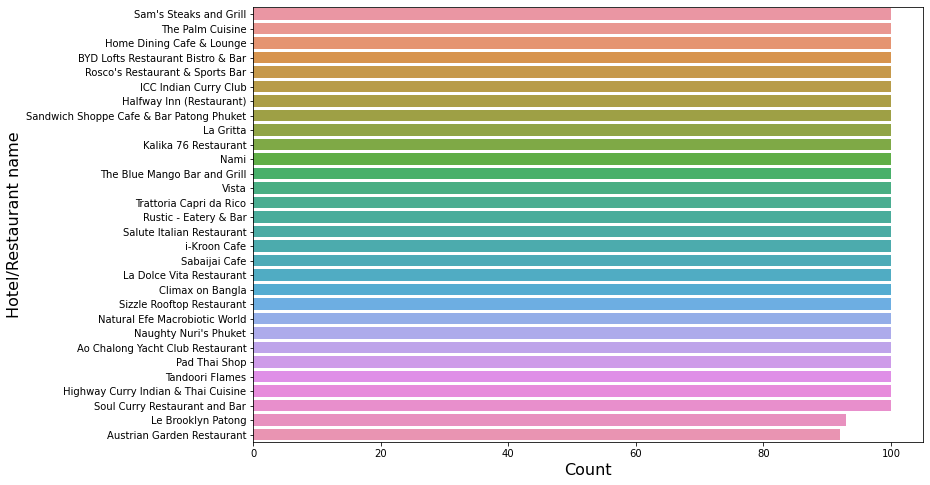

In [17]:
## Plotting a graph of the hotels and the reviews and ordering by the index

plt.figure(figsize=(12,8))
sns.countplot(y='Hotel/Restaurant name', data=hotel_30,
             order=hotel_30['Hotel/Restaurant name'].value_counts().index)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Hotel/Restaurant name', fontsize=16)

plt.show()

## Data Cleaning

In [18]:
# viewing a review 

Hotel_reviews.Review.iloc[20]

'We had a thoroughly enjoyable evening with good quality well cooked food. We shared a variety of tasty starters followed by a duck a L’Orange ( specialty of the house ) which was most tender and succulent. The owner was most hospitable and his wife...More'

In [19]:
## Splitting words by converting them into character tokens

token_compile=re.compile('[a-zA-Z]+')

' '.join(re.findall('[a-zA-Z]+', Hotel_reviews.Review.iloc[20]))

'We had a thoroughly enjoyable evening with good quality well cooked food We shared a variety of tasty starters followed by a duck a L Orange specialty of the house which was most tender and succulent The owner was most hospitable and his wife More'

In [20]:
cleaned_tokens=' '.join([c for c in re.findall('[a-zA-Z]+', Hotel_reviews.Review.iloc[20]) if len(c) >1])

In [21]:
## Lemmatizing

' '.join([word.lemma_ for word in nlp(cleaned_tokens)])

'we have thoroughly enjoyable evening with good quality well cook food we share variety of tasty starter follow by duck Orange specialty of the house which be most tender and succulent the owner be most hospitable and his wife more'

In [33]:
### Creating a function for the cleaning of the hotels' reviews

def lemmatizer(reviews):
    return[word.lemma_ for word in nlp(reviews)]

def data_cleaner(reviews: str) -> str:   #this function cleans the reviews data
                                         #reviews: str is the data that needs to be cleaned
    
    reviews=re.findall('[a-zA-Z]+', reviews) ## to extract only the alphabets
    reviews=' '.join([c for c in reviews if len(c) >1])  ## to join after extracting the alphabets
    reviews=reviews.lower()  ##converts the texts to lower case
    reviews=' '.join([word for word in reviews.split() if word not in STOP_WORDS]) #To split the text and remove the STOP WORDS and return a joined statement
    lemmatized_reviews = lemmatizer(reviews)
    cleaned_reviews=' '.join(lemmatized_reviews)
    
    return cleaned_reviews

In [34]:
#To create another column with the cleaned data and apply the data cleaner function


hotel_30.loc[:, 'Crisp_Reviews'] = hotel_30.loc[:, 'Review'].apply(data_cleaner)

In [36]:
hotel_30.head()

,Hotel/Restaurant name,Review,Crisp_Reviews
0,Sam's Steaks and Grill,its very expensive in comparison to other loca...,expensive comparison local restaurant apple or...
1,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,walk pass holiday inn decide minute steak dinn...
2,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",atmosphere great comfort armchairs efficient s...
3,Sam's Steaks and Grill,We made a reservation at the last minute to di...,reservation minute dine sam stay hotel didn fe...
4,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,great time celebrate son birthday trip phuket ...


# Check for Common Words using Word Cloud

In [69]:
wordcloud_text=' '.join(text for text in hotel_30.Crisp_Reviews)

In [120]:
# Create a function create and display the wordcloud

def plot_cloud(word_cloud):
    
    plt.figure(figsize=(20,10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

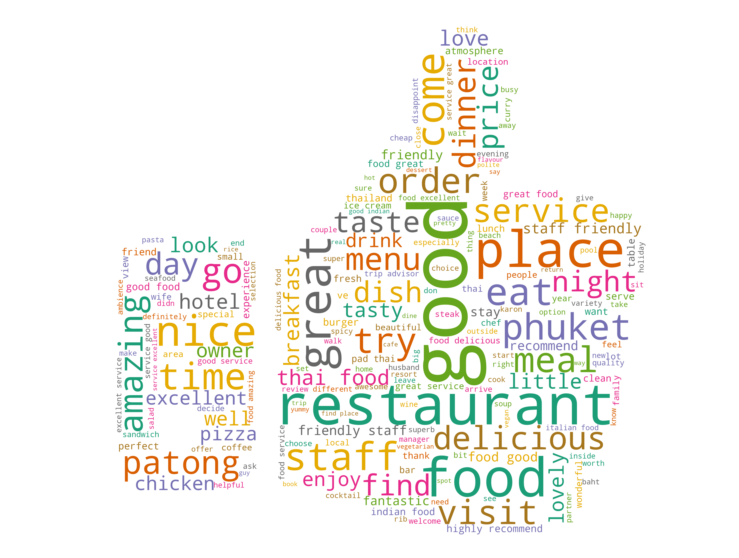

In [128]:
wordcloud_comment=np.array(Image.open('upvote.png'))
wordcloud_reviews=WordCloud(background_color='white', colormap='Dark2', random_state=50, collocations=True, 
                            mask=wordcloud_comment).generate(wordcloud_text)

plot_cloud(wordcloud_reviews)

# Sentiment Classification

In [100]:
polarity= lambda review: TextBlob(review).sentiment.polarity #Creating a function that calculates the polarity
subjectivity = lambda review: TextBlob(review).sentiment.subjectivity #Creating a function that calculates the subjectivity

In [101]:
#Applying the function to the cleaned reviews column

hotel_30.loc[:, 'polarity']=hotel_30.loc[:, 'Crisp_Reviews'].apply(polarity)
hotel_30.loc[:, 'subjectivity']=hotel_30.loc[:, 'Crisp_Reviews'].apply(subjectivity)

In [102]:
hotel_30.head()

,Hotel/Restaurant name,Review,Crisp_Reviews,polarity,subjectivity
0,Sam's Steaks and Grill,its very expensive in comparison to other loca...,expensive comparison local restaurant apple or...,-0.100000,0.490000
1,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,walk pass holiday inn decide minute steak dinn...,0.303333,0.846667
2,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",atmosphere great comfort armchairs efficient s...,0.800000,0.741667
3,Sam's Steaks and Grill,We made a reservation at the last minute to di...,reservation minute dine sam stay hotel didn fe...,0.600000,0.905000
4,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,great time celebrate son birthday trip phuket ...,0.533333,0.541667


In [106]:
hotel_30['Classification'] = 'Neutral'
hotel_30['Classification'] = np.where(hotel_30['polarity'] >= 0.05, 'positive', hotel_30['Classification'])
hotel_30['Classification'] = np.where(hotel_30['polarity'] <= -0.05, 'negative', hotel_30['Classification'])

In [107]:
hotel_30

,Hotel/Restaurant name,Review,Crisp_Reviews,polarity,subjectivity,Classification
0,Sam's Steaks and Grill,its very expensive in comparison to other loca...,expensive comparison local restaurant apple or...,-0.100000,0.490000,negative
1,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,walk pass holiday inn decide minute steak dinn...,0.303333,0.846667,positive
2,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",atmosphere great comfort armchairs efficient s...,0.800000,0.741667,positive
3,Sam's Steaks and Grill,We made a reservation at the last minute to di...,reservation minute dine sam stay hotel didn fe...,0.600000,0.905000,positive
4,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,great time celebrate son birthday trip phuket ...,0.533333,0.541667,positive
...,...,...,...,...,...,...
2980,Soul Curry Restaurant and Bar,We luckily got our hotel room booked at Silver...,luckily get hotel room book silver resortel ne...,0.466667,0.676667,positive
2981,Soul Curry Restaurant and Bar,"The best food we had in Thailand, we had bad t...",good food thailand bad time food thi week come...,0.500000,0.803333,positive
2982,Soul Curry Restaurant and Bar,Best Indian meals you could ask for in Phuket....,good indian meal ask phuket family offer priva...,0.571429,0.659286,positive
2983,Soul Curry Restaurant and Bar,"Good ambience and great service, had fantastic...",good ambience great service fantastic crab goa...,0.633333,0.750000,positive


In [123]:
hotel_30.Classification.value_counts(normalize=True)

positive    0.905193
Neutral     0.051926
negative    0.042881
Name: Classification, dtype: float64